In [1]:
%cd /Users/floriankokoszka/Desktop/notebooks
%pwd

%run mc_startup.ipynb
%run myfunctions.ipynb
%run myfunctions_plus.ipynb

/Users/floriankokoszka/Desktop/notebooks


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
import haversine as hs

In [4]:
%run data_KM3_Pi23.ipynb

/Users/floriankokoszka/Desktop/notebooks


In [5]:
%run data_GEBCO_IONO.ipynb

/Users/floriankokoszka/Desktop/notebooks
/Users/floriankokoszka/Desktop/notebooks
z.shape  (2760, 3600)
lon.shape  (3600,)
lat.shape  (2760,)
zz.shape  (1440, 1680)
lon.shape  (1680,)
lat.shape  (1440,)
(1440, 1680) (1440, 1680) (1440, 1680)
(1680,) (1440,)
reduced 10 for plots
(144, 168) (144, 168) (144, 168)
G E  B   C    O


In [6]:
FLON = []
FLAT = []
FZZG = []

LONG = []
LATG = []
for i in range(0,len(sta)):
    difflon = np.abs(lon_ctd[i]-lonG)
    difflat = np.abs(lat_ctd[i]-latG)

    flon = np.where(difflon == np.nanmin(difflon))[0]
    flat = np.where(difflat == np.nanmin(difflat))[0]

    FLON.append(flon[0])
    FLAT.append(flat[0])
    FZZG.append(ZZG[flat,flon][0])

    LONG.append(lonG[flon][0])
    LATG.append(latG[flat][0])

LONG = np.array(LONG).flatten()
LATG = np.array(LATG).flatten()
FLON = np.array(FLON).flatten()
FLAT = np.array(FLAT).flatten()
FZZG = np.array(FZZG).flatten()

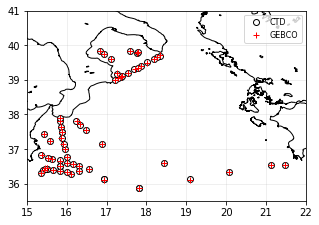

In [15]:
fig , axs =  plt.subplots(1, 1, figsize=(5,3.5))
ax = axs
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.plot(lon_ctd,lat_ctd,'o',color='w',markersize=6,markeredgecolor='k',lw=.5,label='CTD')
ax.plot(LONG,LATG,'+',color='r',label='GEBCO')
ax.set_xlim([15,22])
ax.set_ylim([35.5,41])
ax.legend(fontsize=8,loc=1)
ax.grid(alpha=.25)

### FINER 


In [19]:
### FINER 

Npoints2 = 12
#Npoints = 12

ilon1 = 0
ilat1 = 0

ilon2 = 0
ilat2 = Npoints2

loc1 = [lonG[ilon1],latG[ilat1]]
loc2 = [lonG[ilon2],latG[ilat2]]
delta = hs.haversine(loc1,loc2)
print(Npoints2,'points | delta:',np.round(delta,3),'km')
print('         | 2 x : ',2*np.round(delta,3),'km')

# 23 points = 10 km
# 67 points = 30 km
# 7 points = 3 km

12 points | delta: 5.37 km
         | 2 x :  10.74 km


In [20]:
### variance and slopes

di = Npoints2
print(di)

zG = []
dh = []
dz = []
dzdh = []
VAR_Z = []

VAR10_Z = []
RMS2_Z = []
RMS210_Z = []
for i in range(0,len(FLON)):
    #print(FLON[i],FLAT[i],FZZG[i])
    flo = FLON[i]
    flonm = flo-di
    flonp = flo+di

    fla = FLAT[i]
    flatm = fla-di
    flatp = fla+di

    ZZ_zone = ZZG[np.ix_(np.arange(flatm,flatp+1),np.arange(flonm,flonp+1))]
    VAR_Z.append(np.nanvar(ZZ_zone))
    VAR10_Z.append(np.log10(np.nanvar(ZZ_zone)))
    rms =( (1/len(ZZ_zone.flatten())) * np.sum(  ZZ_zone.flatten() **2) )**(1/2)
    #print(rms)
    RMS2_Z.append(rms**2)
    RMS210_Z.append(np.log10(rms**2))
    
    loc0 = np.array([lonG[flo],latG[fla]]).flatten()
    loc1 = np.array([lonG[flo+di],latG[fla+0]]).flatten()
    loc2 = np.array([lonG[flo+di],latG[fla+di]]).flatten()
    loc3 = np.array([lonG[flo+0],latG[fla+di]]).flatten()
    loc4 = np.array([lonG[flo-di],latG[fla+di]]).flatten()
    loc5 = np.array([lonG[flo-di],latG[fla+0]]).flatten()
    loc6 = np.array([lonG[flo-di],latG[fla-di]]).flatten()
    loc7 = np.array([lonG[flo+0],latG[fla-di]]).flatten()
    loc8 = np.array([lonG[flo+di],latG[fla-di]]).flatten()

    zzG0 = ZZG[fla,flo]
    zzG1 = ZZG[fla+0,flo+di]
    zzG2 = ZZG[fla+di,flo+di]
    zzG3 = ZZG[fla+di,flo+0]
    zzG4 = ZZG[fla+di,flo-di]
    zzG5 = ZZG[fla+0,flo-di]
    zzG6 = ZZG[fla-di,flo-di]
    zzG7 = ZZG[fla-di,flo+0]
    zzG8 = ZZG[fla-di,flo+di]
    zG.append([zzG1,zzG2,zzG3,zzG4,zzG5,zzG6,zzG7,zzG8])

    dh1 = hs.haversine(loc0,loc1)
    dh2 = hs.haversine(loc0,loc2)
    dh3 = hs.haversine(loc0,loc3)
    dh4 = hs.haversine(loc0,loc4)
    dh5 = hs.haversine(loc0,loc5)
    dh6 = hs.haversine(loc0,loc6)
    dh7 = hs.haversine(loc0,loc7)
    dh8 = hs.haversine(loc0,loc8)
    dh.append([dh1,dh2,dh3,dh4,dh5,dh6,dh7,dh8])

    dz1 = np.abs(zzG0-zzG1)
    dz2 = np.abs(zzG0-zzG2)
    dz3 = np.abs(zzG0-zzG3)
    dz4 = np.abs(zzG0-zzG4)
    dz5 = np.abs(zzG0-zzG5)
    dz6 = np.abs(zzG0-zzG6)
    dz7 = np.abs(zzG0-zzG7)
    dz8 = np.abs(zzG0-zzG8)
    dz.append([dz1,dz2,dz3,dz4,dz5,dz6,dz7,dz8])

    dzdh.append([dz1/dh1,dz2/dh2,dz3/dh3,dz4/dh4,dz5/dh5,dz6/dh6,dz7/dh7,dz8/dh8])

zG = np.array(zG)
dh = np.array(dh)
dz = np.array(dz)
dzdh = np.array(dzdh)
VAR_Z = np.array(VAR_Z)
VAR10_Z = np.array(VAR10_Z)
RMS2_Z = np.array(RMS2_Z)
RMS210_Z = np.array(RMS210_Z)

12


In [21]:
# flow directions from Bensi et al. 

# Gr1 = 50?
# Gr2 = 50?
# 13 = 60?
# 12 = 75?
# NK17 = 20?
# 3, 11 = -35?
# NK30,NK31,NK32,NK34 = -40?
# NK26,NK27 = -25?
# NK21,NK22,NK23,NK24,NK25 = -65?
# NK18,NK15,NK14,NK13,NK12,NK11,NK10,NK1 = -75?
# NK8b,NK6,NK4, NK2,KM3,KM4 = -85?

dirflows = np.array([99999]*len(sta))

dirflows[np.where(sta == 'NK8b')[0]] = -85
dirflows[np.where(sta == 'NK6')[0]]  = -85
dirflows[np.where(sta == 'NK4')[0]]  = -85
dirflows[np.where(sta == 'NK2')[0]]  = -85
dirflows[np.where(sta == 'KM3')[0]]  = -85
dirflows[np.where(sta == 'KM4')[0]]  = -85

dirflows[np.where(sta == 'GR1')[0]]  = 50
dirflows[np.where(sta == 'GR2')[0]]  = 50
dirflows[np.where(sta == '13')[0]]   = 60
dirflows[np.where(sta == '12')[0]]   = 75
dirflows[np.where(sta == 'NK17')[0]] = 20

dirflows[np.where(sta == '3')[0]]  = -35
dirflows[np.where(sta == '11')[0]] = -35

dirflows[np.where(sta == 'NK30')[0]] = -40
dirflows[np.where(sta == 'NK31')[0]] = -40
dirflows[np.where(sta == 'NK32')[0]] = -40
dirflows[np.where(sta == 'NK34')[0]] = -40

dirflows[np.where(sta == 'NK26')[0]] = -25
dirflows[np.where(sta == 'NK27')[0]] = -25

dirflows[np.where(sta == 'NK21')[0]] = -65
dirflows[np.where(sta == 'NK22')[0]] = -65
dirflows[np.where(sta == 'NK23')[0]] = -65
dirflows[np.where(sta == 'NK24')[0]] = -65
dirflows[np.where(sta == 'NK25')[0]] = -65

dirflows[np.where(sta == 'NK18')[0]] = -75
dirflows[np.where(sta == 'NK15')[0]] = -75
dirflows[np.where(sta == 'NK14')[0]] = -75
dirflows[np.where(sta == 'NK13')[0]] = -75
dirflows[np.where(sta == 'NK12')[0]] = -75
dirflows[np.where(sta == 'NK11')[0]] = -75
dirflows[np.where(sta == 'NK10')[0]] = -75
dirflows[np.where(sta == 'NK1')[0]]  = -75


In [22]:
np.unique(dirflows)

poiflows = []
idiflows = []
for i in range(0,len(dirflows)):
    d = dirflows[i]
    if    d == -85 : p = np.array([5])
    elif  d == -75 : p = np.array([4,5])
    elif  d == -65 : p = np.array([4,5])
    elif  d == -45 : p = np.array([4])
    elif  d == -35 : p = np.array([4])
    elif  d == -25 : p = np.array([3,4])
    elif  d ==  20 : p = np.array([2,3])
    elif  d ==  50 : p = np.array([2])
    elif  d ==  60 : p = np.array([1,2])
    elif  d ==  75 : p = np.array([1,2])
    elif  d ==  99999 : p = np.array([1,2,3,4,5,6,7,8])

    poiflows.append(p)
    idiflows.append(p-1)

In [23]:
DZDH_finer = []
DZDHM_finer = []
DZDH2_finer = []
for i in range(0,len(sta)):
    idx = idiflows[i]
    vals = np.array(dzdh[i,:].flatten())
    DZDH_finer.append( np.nanmean(vals[idx]) )
    DZDHM_finer.append( np.nanmean(vals) )
    DZDH2_finer.append( np.sqrt( np.nanmean(vals[[1,5]])**2 + np.nanmean(vals[[3,7]])**2 ) )
    
DZDH_finer = np.array(DZDH_finer)
DZDHM_finer = np.array(DZDHM_finer)
DZDH2_finer = np.array(DZDH2_finer)

In [29]:
SLOPF_finer_gebco = DZDH_finer.flatten()
SLOPM_finer_gebco = DZDHM_finer.flatten()
SLOP2_finer_gebco = DZDH2_finer.flatten()


### SLOPE NPOINTS AROUND

In [33]:

Npoints = 23
#Npoints = 12

ilon1 = 0
ilat1 = 0

ilon2 = 0
ilat2 = Npoints

loc1 = [lonG[ilon1],latG[ilat1]]
loc2 = [lonG[ilon2],latG[ilat2]]
delta = hs.haversine(loc1,loc2)
print(Npoints,'points | delta:',np.round(delta,3),'km')
print('         | 2 x : ',2*np.round(delta,3),'km')

# 23 points = 10 km
# 67 points = 30 km
# 7 points = 3 km

23 points | delta: 10.293 km
         | 2 x :  20.586 km


In [34]:
### variance and slopes

di = Npoints
print(di)

zG = []
dh = []
dz = []
dzdh = []
VAR_Z = []

VAR10_Z = []
RMS2_Z = []
RMS210_Z = []
for i in range(0,len(FLON)):
    #print(FLON[i],FLAT[i],FZZG[i])
    flo = FLON[i]
    flonm = flo-di
    flonp = flo+di

    fla = FLAT[i]
    flatm = fla-di
    flatp = fla+di

    ZZ_zone = ZZG[np.ix_(np.arange(flatm,flatp+1),np.arange(flonm,flonp+1))]
    VAR_Z.append(np.nanvar(ZZ_zone))
    VAR10_Z.append(np.log10(np.nanvar(ZZ_zone)))
    rms =( (1/len(ZZ_zone.flatten())) * np.sum(  ZZ_zone.flatten() **2) )**(1/2)
    #print(rms)
    RMS2_Z.append(rms**2)
    RMS210_Z.append(np.log10(rms**2))
    
    loc0 = np.array([lonG[flo],latG[fla]]).flatten()
    loc1 = np.array([lonG[flo+di],latG[fla+0]]).flatten()
    loc2 = np.array([lonG[flo+di],latG[fla+di]]).flatten()
    loc3 = np.array([lonG[flo+0],latG[fla+di]]).flatten()
    loc4 = np.array([lonG[flo-di],latG[fla+di]]).flatten()
    loc5 = np.array([lonG[flo-di],latG[fla+0]]).flatten()
    loc6 = np.array([lonG[flo-di],latG[fla-di]]).flatten()
    loc7 = np.array([lonG[flo+0],latG[fla-di]]).flatten()
    loc8 = np.array([lonG[flo+di],latG[fla-di]]).flatten()

    zzG0 = ZZG[fla,flo]
    zzG1 = ZZG[fla+0,flo+di]
    zzG2 = ZZG[fla+di,flo+di]
    zzG3 = ZZG[fla+di,flo+0]
    zzG4 = ZZG[fla+di,flo-di]
    zzG5 = ZZG[fla+0,flo-di]
    zzG6 = ZZG[fla-di,flo-di]
    zzG7 = ZZG[fla-di,flo+0]
    zzG8 = ZZG[fla-di,flo+di]
    zG.append([zzG1,zzG2,zzG3,zzG4,zzG5,zzG6,zzG7,zzG8])

    dh1 = hs.haversine(loc0,loc1)
    dh2 = hs.haversine(loc0,loc2)
    dh3 = hs.haversine(loc0,loc3)
    dh4 = hs.haversine(loc0,loc4)
    dh5 = hs.haversine(loc0,loc5)
    dh6 = hs.haversine(loc0,loc6)
    dh7 = hs.haversine(loc0,loc7)
    dh8 = hs.haversine(loc0,loc8)
    dh.append([dh1,dh2,dh3,dh4,dh5,dh6,dh7,dh8])

    dz1 = np.abs(zzG0-zzG1)
    dz2 = np.abs(zzG0-zzG2)
    dz3 = np.abs(zzG0-zzG3)
    dz4 = np.abs(zzG0-zzG4)
    dz5 = np.abs(zzG0-zzG5)
    dz6 = np.abs(zzG0-zzG6)
    dz7 = np.abs(zzG0-zzG7)
    dz8 = np.abs(zzG0-zzG8)
    dz.append([dz1,dz2,dz3,dz4,dz5,dz6,dz7,dz8])

    dzdh.append([dz1/dh1,dz2/dh2,dz3/dh3,dz4/dh4,dz5/dh5,dz6/dh6,dz7/dh7,dz8/dh8])

zG = np.array(zG)
dh = np.array(dh)
dz = np.array(dz)
dzdh = np.array(dzdh)
VAR_Z = np.array(VAR_Z)
VAR10_Z = np.array(VAR10_Z)
RMS2_Z = np.array(RMS2_Z)
RMS210_Z = np.array(RMS210_Z)

23


In [35]:
# flow directions from Bensi et al. 

# Gr1 = 50?
# Gr2 = 50?
# 13 = 60?
# 12 = 75?
# NK17 = 20?
# 3, 11 = -35?
# NK30,NK31,NK32,NK34 = -40?
# NK26,NK27 = -25?
# NK21,NK22,NK23,NK24,NK25 = -65?
# NK18,NK15,NK14,NK13,NK12,NK11,NK10,NK1 = -75?
# NK8b,NK6,NK4, NK2,KM3,KM4 = -85?

dirflows = np.array([99999]*len(sta))

dirflows[np.where(sta == 'NK8b')[0]] = -85
dirflows[np.where(sta == 'NK6')[0]]  = -85
dirflows[np.where(sta == 'NK4')[0]]  = -85
dirflows[np.where(sta == 'NK2')[0]]  = -85
dirflows[np.where(sta == 'KM3')[0]]  = -85
dirflows[np.where(sta == 'KM4')[0]]  = -85

dirflows[np.where(sta == 'GR1')[0]]  = 50
dirflows[np.where(sta == 'GR2')[0]]  = 50
dirflows[np.where(sta == '13')[0]]   = 60
dirflows[np.where(sta == '12')[0]]   = 75
dirflows[np.where(sta == 'NK17')[0]] = 20

dirflows[np.where(sta == '3')[0]]  = -35
dirflows[np.where(sta == '11')[0]] = -35

dirflows[np.where(sta == 'NK30')[0]] = -40
dirflows[np.where(sta == 'NK31')[0]] = -40
dirflows[np.where(sta == 'NK32')[0]] = -40
dirflows[np.where(sta == 'NK34')[0]] = -40

dirflows[np.where(sta == 'NK26')[0]] = -25
dirflows[np.where(sta == 'NK27')[0]] = -25

dirflows[np.where(sta == 'NK21')[0]] = -65
dirflows[np.where(sta == 'NK22')[0]] = -65
dirflows[np.where(sta == 'NK23')[0]] = -65
dirflows[np.where(sta == 'NK24')[0]] = -65
dirflows[np.where(sta == 'NK25')[0]] = -65

dirflows[np.where(sta == 'NK18')[0]] = -75
dirflows[np.where(sta == 'NK15')[0]] = -75
dirflows[np.where(sta == 'NK14')[0]] = -75
dirflows[np.where(sta == 'NK13')[0]] = -75
dirflows[np.where(sta == 'NK12')[0]] = -75
dirflows[np.where(sta == 'NK11')[0]] = -75
dirflows[np.where(sta == 'NK10')[0]] = -75
dirflows[np.where(sta == 'NK1')[0]]  = -75


In [36]:
np.unique(dirflows)

poiflows = []
idiflows = []
for i in range(0,len(dirflows)):
    d = dirflows[i]
    if    d == -85 : p = np.array([5])
    elif  d == -75 : p = np.array([4,5])
    elif  d == -65 : p = np.array([4,5])
    elif  d == -45 : p = np.array([4])
    elif  d == -35 : p = np.array([4])
    elif  d == -25 : p = np.array([3,4])
    elif  d ==  20 : p = np.array([2,3])
    elif  d ==  50 : p = np.array([2])
    elif  d ==  60 : p = np.array([1,2])
    elif  d ==  75 : p = np.array([1,2])
    elif  d ==  99999 : p = np.array([1,2,3,4,5,6,7,8])

    poiflows.append(p)
    idiflows.append(p-1)

In [37]:
DZDH = []
DZDHM = []
for i in range(0,len(sta)):
    idx = idiflows[i]
    vals = np.array(dzdh[i,:].flatten())
    DZDH.append( np.nanmean(vals[idx]) )
    DZDHM.append( np.nanmean(vals) )
DZDH = np.array(DZDH)
DZDHM = np.array(DZDHM)


In [39]:
BTTD_gebco = FZZG.flatten()
SLOPF_gebco = DZDH.flatten()
SLOPM_gebco = DZDHM.flatten()
ROGH_gebco = VAR_Z.flatten()
ROGH10_gebco = VAR10_Z.flatten()
RMS2_gebco = RMS2_Z.flatten()
RMS210_gebco = RMS210_Z.flatten()

SLAPF_gebco  = np.degrees(np.arctan(SLOPF_gebco  / 1e3))
SLAPM_gebco = np.degrees(np.arctan(SLOPM_gebco / 1e3))



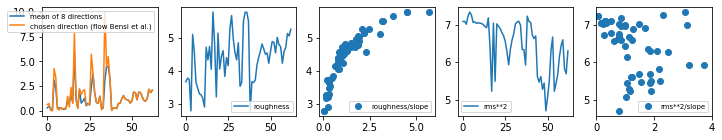

In [41]:
fig , axs =  plt.subplots(1, 5, figsize=(12,2))
ax = axs[0]
ax.plot(SLAPM_gebco,label='mean of 8 directions')
ax.plot(SLAPF_gebco,label='chosen direction (flow Bensi et al.)')
ax.legend(fontsize=7)
ax = axs[1]
ax.plot(ROGH10_gebco,label='roughness')
ax.legend(fontsize=7)
ax = axs[2]
ax.plot(SLAPM_gebco,ROGH10_gebco,'o',label='roughness/slope')
ax.legend(fontsize=7)
ax = axs[3]
ax.plot(RMS210_gebco,'-',label='rms**2')
ax.legend(fontsize=7)
ax = axs[4]
ax.plot(SLAPM_gebco,RMS210_gebco,'o',label='rms**2/slope')
ax.legend(fontsize=7)
ax.set_xlim(0,4)

fig_old = fig
#plt.close(fig)

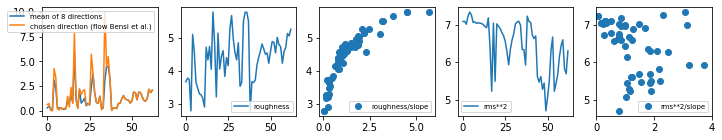

In [40]:
fig_old

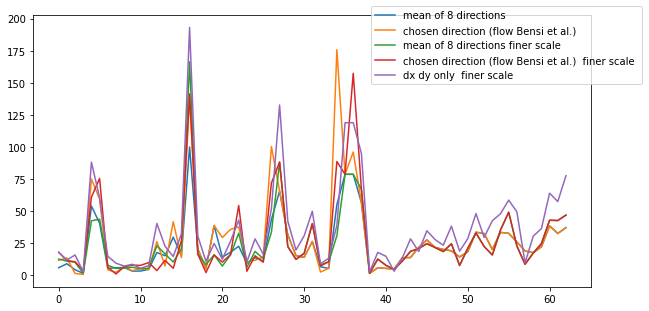

In [45]:
fig , axs =  plt.subplots(1, 1, figsize=(10,5))
ax = axs
ax.plot(SLOPM_gebco,label='mean of 8 directions')
ax.plot(SLOPF_gebco,label='chosen direction (flow Bensi et al.)')

ax.plot(SLOPM_finer_gebco,label='mean of 8 directions finer scale')
ax.plot(SLOPF_finer_gebco,label='chosen direction (flow Bensi et al.)  finer scale ')

ax.plot(SLOP2_finer_gebco,label='dx dy only  finer scale ')

ax.legend(fontsize=10,bbox_to_anchor=(1.1, 1.05))

### Local slope and roughness

In [180]:
print('local slope and roughness \n (takes time ...)')

local slope and roughness 
 (takes time ...)


In [ ]:
## LOCAL ROUGHNESS

LOCAL_ROUGH = ZZG*np.nan
LOCAL_SLOPE = ZZG*np.nan

di = 23*1 # 10 km
#
for i in range(di,len(latG)-di):
    for j in range(di,len(lonG)-di):
        fla = i
        flo = j
 
        flonm = j-di
        flonp = j+di

        flatm = i-di
        flatp = i+di

        ZZ_zone = ZZG[np.ix_(np.arange(flatm,flatp+1),np.arange(flonm,flonp+1))]
        LOCAL_ROUGH[i,j] = np.log10(np.nanvar(ZZ_zone))
        

        loc0 = np.array([lonG[flo],latG[fla]]).flatten()
        loc1 = np.array([lonG[flo+di],latG[fla+0]]).flatten()
        loc2 = np.array([lonG[flo+di],latG[fla+di]]).flatten()
        loc3 = np.array([lonG[flo+0],latG[fla+di]]).flatten()
        loc4 = np.array([lonG[flo-di],latG[fla+di]]).flatten()
        loc5 = np.array([lonG[flo-di],latG[fla+0]]).flatten()
        loc6 = np.array([lonG[flo-di],latG[fla-di]]).flatten()
        loc7 = np.array([lonG[flo+0],latG[fla-di]]).flatten()
        loc8 = np.array([lonG[flo+di],latG[fla-di]]).flatten()

        zzG0 = ZZG[fla,flo]
        zzG1 = ZZG[fla+0,flo+di]
        zzG2 = ZZG[fla+di,flo+di]
        zzG3 = ZZG[fla+di,flo+0]
        zzG4 = ZZG[fla+di,flo-di]
        zzG5 = ZZG[fla+0,flo-di]
        zzG6 = ZZG[fla-di,flo-di]
        zzG7 = ZZG[fla-di,flo+0]
        zzG8 = ZZG[fla-di,flo+di]
        zG = [zzG1,zzG2,zzG3,zzG4,zzG5,zzG6,zzG7,zzG8]

        dh1 = hs.haversine(loc0,loc1)
        dh2 = hs.haversine(loc0,loc2)
        dh3 = hs.haversine(loc0,loc3)
        dh4 = hs.haversine(loc0,loc4)
        dh5 = hs.haversine(loc0,loc5)
        dh6 = hs.haversine(loc0,loc6)
        dh7 = hs.haversine(loc0,loc7)
        dh8 = hs.haversine(loc0,loc8)
        dh = [dh1,dh2,dh3,dh4,dh5,dh6,dh7,dh8]

        dz1 = np.abs(zzG0-zzG1)
        dz2 = np.abs(zzG0-zzG2)
        dz3 = np.abs(zzG0-zzG3)
        dz4 = np.abs(zzG0-zzG4)
        dz5 = np.abs(zzG0-zzG5)
        dz6 = np.abs(zzG0-zzG6)
        dz7 = np.abs(zzG0-zzG7)
        dz8 = np.abs(zzG0-zzG8)
        dz = [dz1,dz2,dz3,dz4,dz5,dz6,dz7,dz8]

        dzdh = [dz1/dh1,dz2/dh2,dz3/dh3,dz4/dh4,dz5/dh5,dz6/dh6,dz7/dh7,dz8/dh8]
        
        LOCAL_SLOPE[i,j] = np.nanmean(dzdh) 
LOCAL_SLAPE  = np.degrees(np.arctan(LOCAL_SLOPE  / 1e3))   
        #VAR10_Z.append(np.log10(np.nanvar(ZZ_zone)))
print('done: LOCAL_SLAPE, LOCAL_ROUGH',LOCAL_ROUGH.shape)